# Name- Kapil Bhardwaj


# 🎰 The Casino Challenge — Multi‑Armed Bandits & ε‑Greedy (Gamified Workshop)

**Goal:** Compete to maximize reward while learning the exploration–exploitation trade‑off using **ε‑greedy** policies.

**You will:**
- Implement and *play* with ε‑greedy on a fixed set of bandit arms (Round 1: Stationary).
- Compete on a leaderboard (submit your score locally).
- Reflect on how exploration affects performance.
- Face a twist (Round 2: **Non‑Stationary** bandits) and adapt your strategy.



## 🔧 Setup

Run the cell below. If you're on Colab/Jupyter, required libraries should already be available.


In [14]:

import numpy as np
import matplotlib.pyplot as plt
import time
from pathlib import Path
from datetime import datetime

plt.rcParams['figure.figsize'] = (8, 4)

print("Numpy:", np.__version__)
print("Matplotlib:", plt.matplotlib.__version__)


Numpy: 1.26.3
Matplotlib: 3.10.3


In [15]:

def plot_cumulative(rewards, title="Cumulative Reward"):
    plt.figure()
    plt.plot(np.cumsum(rewards))
    plt.title(title)
    plt.xlabel("Step")
    plt.ylabel("Cumulative Reward")
    plt.show()



## 🎲 Environment: Stationary Bernoulli Bandits

Ten arms, each with a hidden probability of reward. You won't see the true means during play, but we print them here for **instructor debugging/analysis**. You may comment this out during the competition.


In [16]:

def make_stationary_bandit(n_arms=10, seed=42):
    rng = np.random.default_rng(seed)
    true_means = rng.random(n_arms)  # in [0,1)
    return true_means

# Instructor may reveal (comment out in live competition to keep secret)
SEED_ENV = 42  # 🔒 Keep this fixed across all students for fairness (Round 1)
TRUE_MEANS = make_stationary_bandit(seed=SEED_ENV)
print("DEBUG — True means (hidden in competition):", np.round(TRUE_MEANS, 3))


DEBUG — True means (hidden in competition): [0.774 0.439 0.859 0.697 0.094 0.976 0.761 0.786 0.128 0.45 ]



## 🤖 Agent: ε‑Greedy (Fixed or Decaying)

- With probability **ε**, explore a random arm.
- Otherwise, exploit the best arm found so far (highest estimated value).
- Estimates updated via **incremental sample average**.


In [17]:

def epsilon_greedy(true_means, steps=1000, epsilon=0.1, seed=None):
    rng = np.random.default_rng(seed)
    n_arms = len(true_means)
    Q = np.zeros(n_arms)     # value estimates
    N = np.zeros(n_arms)     # counts
    rewards = np.zeros(steps, dtype=float)
    actions = np.zeros(steps, dtype=int)
    for t in range(steps):
        if rng.random() < epsilon:
            a = rng.integers(0, n_arms)
        else:
            a = int(np.argmax(Q))
        r = 1.0 if rng.random() < true_means[a] else 0.0
        N[a] += 1
        Q[a] += (r - Q[a]) / N[a]  # incremental mean
        rewards[t] = r
        actions[t] = a
    return rewards, actions, Q, N

def epsilon_greedy_decaying(true_means, steps=1000, eps_start=0.5, eps_end=0.05, seed=None):
    rng = np.random.default_rng(seed)
    n_arms = len(true_means)
    Q = np.zeros(n_arms)
    N = np.zeros(n_arms)
    rewards = np.zeros(steps, dtype=float)
    actions = np.zeros(steps, dtype=int)
    for t in range(steps):
        # Linear decay
        epsilon = eps_end + (eps_start - eps_end) * max(0, (steps - 1 - t)) / max(1, steps - 1)
        if rng.random() < epsilon:
            a = rng.integers(0, n_arms)
        else:
            a = int(np.argmax(Q))
        r = 1.0 if rng.random() < true_means[a] else 0.0
        N[a] += 1
        Q[a] += (r - Q[a]) / N[a]
        rewards[t] = r
        actions[t] = a
    return rewards, actions, Q, N



# 🏁 Round 1 — Stationary Casino (Competition)

**Instructions**
1. Set your **NAME** and **STRATEGY**.
2. Choose **steps** and **ε** (or decaying ε parameters).
3. Run the simulation cell.
4. Submit to the local leaderboard (next cell).

> Everyone must use the same **SEED_ENV** to ensure the environment is identical. You can set your **agent seed** for reproducibility.



Player: Your Name
Strategy: epsilon_greedy (fixed_eps=0.1)
Steps: 2000
Total Reward: 1862
Estimated Best Arm: 5
Estimated Q: [0.729 0.52  0.923 0.75  0.095 0.973 0.783 0.857 0.19  0.143]
Counts N: [  48   25   26   24   21 1770   23   28   21   14]



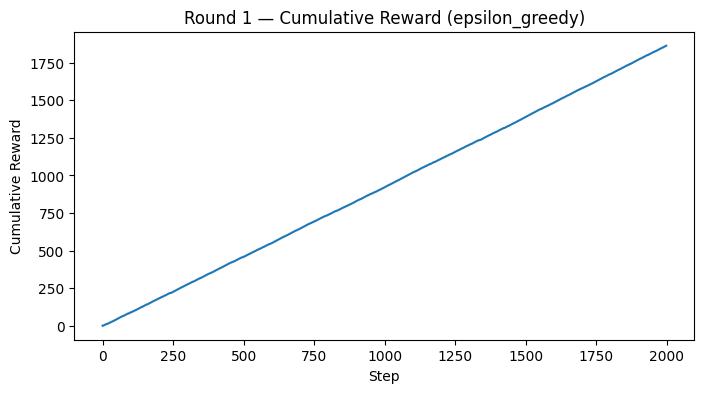

In [18]:

# === YOUR SETTINGS (edit) ===
NAME = "Your Name"
STRATEGY = "epsilon_greedy"  # options: "epsilon_greedy" or "epsilon_greedy_decaying"
STEPS = 2000

# For fixed ε
EPSILON = 0.1

# For decaying ε
EPS_START = 0.5
EPS_END = 0.05

# Agent RNG seed (can be None for randomness)
SEED_AGENT = 123

# === RUN ===
if STRATEGY == "epsilon_greedy":
    rewards, actions, Q, N = epsilon_greedy(TRUE_MEANS, steps=STEPS, epsilon=EPSILON, seed=SEED_AGENT)
    strat_desc = f"fixed_eps={EPSILON}"
elif STRATEGY == "epsilon_greedy_decaying":
    rewards, actions, Q, N = epsilon_greedy_decaying(TRUE_MEANS, steps=STEPS, eps_start=EPS_START, eps_end=EPS_END, seed=SEED_AGENT)
    strat_desc = f"decay_eps={EPS_START}->{EPS_END}"
else:
    raise ValueError("Unknown STRATEGY setting")

total = float(np.sum(rewards))
best_arm_est = int(np.argmax(Q))
print(f"""
Player: {NAME}
Strategy: {STRATEGY} ({strat_desc})
Steps: {STEPS}
Total Reward: {total:.0f}
Estimated Best Arm: {best_arm_est}
Estimated Q: {np.round(Q,3)}
Counts N: {N.astype(int)}
""")
plot_cumulative(rewards, title=f"Round 1 — Cumulative Reward ({STRATEGY})")



### 🧮 Submit to Leaderboard (Round 1)

This writes your result to a local CSV (`submissions_round1.csv`) in the current folder.  
The instructor can collect these files or run the next cell to view a local leaderboard.


In [19]:

import csv

lb_path = Path("submissions_round1.csv")
lb_exists = lb_path.exists()

row = {
    "timestamp": datetime.utcnow().isoformat(),
    "name": NAME,
    "strategy": STRATEGY,
    "details": strat_desc,
    "steps": STEPS,
    "seed_env": SEED_ENV,
    "seed_agent": SEED_AGENT,
    "total_reward": int(np.sum(rewards))
}

fieldnames = ["timestamp","name","strategy","details","steps","seed_env","seed_agent","total_reward"]

with open(lb_path, "a", newline="") as f:
    writer = csv.DictWriter(f, fieldnames=fieldnames)
    if not lb_exists:
        writer.writeheader()
    writer.writerow(row)

print("Submitted to", lb_path.resolve())


Submitted to D:\Conestoga college\Sem 2\04 Friday - CSCN8020 Reinforcement learning\week 9\MultiArmedBanditWorkshop---Week9\submissions_round1.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_10812\2191877043.py:7: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  "timestamp": datetime.utcnow().isoformat(),


In [20]:
import pandas as pd
from IPython.display import display

lb_path = Path("submissions_round1.csv")

if lb_path.exists():
    df = pd.read_csv(lb_path)
    df_sorted = df.sort_values("total_reward", ascending=False).reset_index(drop=True)
    print("🏆 Round 1 Leaderboard (sorted by total reward):")
    display(df_sorted)
else:
    print("No submissions yet. Run the previous cell to submit your score.")


🏆 Round 1 Leaderboard (sorted by total reward):


,timestamp,name,strategy,details,steps,seed_env,seed_agent,total_reward
0,2025-10-31T21:16:54.184665,Your Name,epsilon_greedy,fixed_eps=0.1,2000,42,123,1862
1,2025-10-31T21:30:49.966679,Your Name,epsilon_greedy,fixed_eps=0.1,2000,42,123,1862



## 🧠 Step 6 — Reflect & Discuss (for your notes / debrief)

1. **What strategy did you use and why?**  
2. **How did ε influence your total reward?** Did you try multiple ε values?
3. **Did your agent get “stuck” exploiting too soon?** How could you prevent that?
4. **If you had more steps, what would you change (ε schedule, update rule, etc.)?**
5. **Compare with others:** Did randomness or design matter more for the winners?
6. **Transfer:** Where would this exploration dilemma appear in real systems (recsys, A/B testing, ads)?



## 📊 Experiment: Compare Different ε Values (Optional)

Run multiple ε settings to *see* the exploration trade‑off.


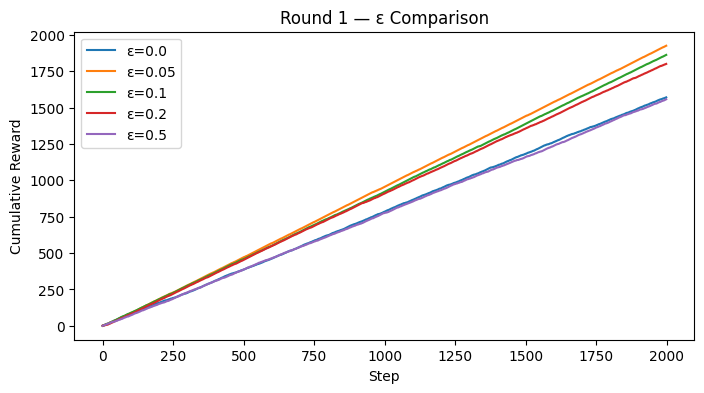

In [21]:

eps_list = [0.0, 0.05, 0.1, 0.2, 0.5]
curves = {}
for eps in eps_list:
    r, _, _, _ = epsilon_greedy(TRUE_MEANS, steps=STEPS, epsilon=eps, seed=SEED_AGENT)
    curves[eps] = np.cumsum(r)

plt.figure()
for eps, curve in curves.items():
    plt.plot(curve, label=f"ε={eps}")
plt.legend()
plt.xlabel("Step")
plt.ylabel("Cumulative Reward")
plt.title("Round 1 — ε Comparison")
plt.show()



# 🔄 Round 2 — Non‑Stationary Casino (Competition)

**Twist:** The slot machines drift over time. Fixed exploitation can fail; adaptive exploration helps.

Two common adaptations:
- Keep **ε** from decaying too low (retain exploration).
- Use a **constant step size α** (exponential moving average) to weight recent rewards more.


In [22]:

def nonstationary_means(n_arms=10, seed=2025):
    # Initialize random means
    rng = np.random.default_rng(seed)
    return rng.random(n_arms)

def step_drift(means, drift_scale=0.01, rng=None):
    if rng is None:
        rng = np.random.default_rng()
    means = means + rng.normal(0, drift_scale, size=means.shape)
    return np.clip(means, 0.0, 1.0)

def epsilon_greedy_constant_alpha(steps=2000, n_arms=10, eps=0.1, alpha=0.1, seed_env=7, seed_agent=None, drift_scale=0.01):
    # Non-stationary env with drifting means
    rng_env = np.random.default_rng(seed_env)
    rng_agent = np.random.default_rng(seed_agent)
    means = rng_env.random(n_arms)
    Q = np.zeros(n_arms)
    rewards = np.zeros(steps, dtype=float)
    actions = np.zeros(steps, dtype=int)
    for t in range(steps):
        # choose action
        if rng_agent.random() < eps:
            a = rng_agent.integers(0, n_arms)
        else:
            a = int(np.argmax(Q))
        # reward from current means
        r = 1.0 if rng_env.random() < means[a] else 0.0
        # constant step-size update (EMA)
        Q[a] = Q[a] + alpha * (r - Q[a])
        rewards[t] = r
        actions[t] = a
        # drift environment
        means = step_drift(means, drift_scale=drift_scale, rng=rng_env)
    return rewards, actions, Q



[Round 2]
Player: Your Name
Strategy: epsilon_greedy + constant_alpha (eps=0.1, alpha=0.1)
Steps: 3000
Total Reward: 2557



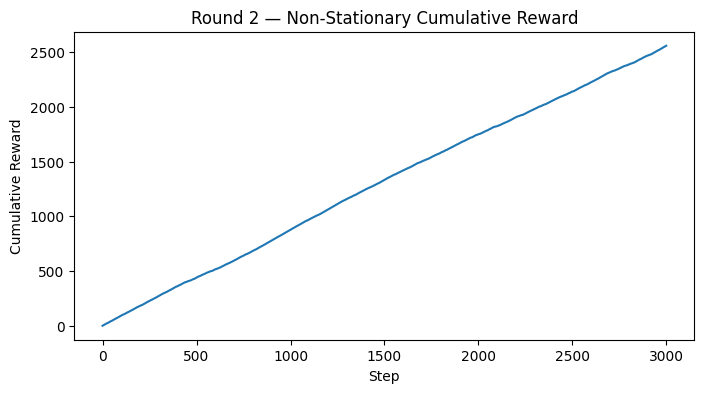

In [23]:

# === YOUR SETTINGS (edit) ===
NAME_R2 = "Your Name"
STEPS_R2 = 3000
EPS_R2 = 0.1     # keep some exploration alive
ALPHA_R2 = 0.1   # constant step size for non-stationarity
SEED_ENV_R2 = 2025  # shared across class
SEED_AGENT_R2 = 999
DRIFT_SCALE = 0.01  # magnitude of mean drift per step

# === RUN ===
rewards_r2, actions_r2, Q_r2 = epsilon_greedy_constant_alpha(
    steps=STEPS_R2, n_arms=10, eps=EPS_R2, alpha=ALPHA_R2,
    seed_env=SEED_ENV_R2, seed_agent=SEED_AGENT_R2, drift_scale=DRIFT_SCALE
)

total_r2 = int(np.sum(rewards_r2))
print(f"""
[Round 2]
Player: {NAME_R2}
Strategy: epsilon_greedy + constant_alpha (eps={EPS_R2}, alpha={ALPHA_R2})
Steps: {STEPS_R2}
Total Reward: {total_r2}
""")
plot_cumulative(rewards_r2, title="Round 2 — Non‑Stationary Cumulative Reward")


In [24]:

import csv
lb2_path = Path("submissions_round2.csv")
lb2_exists = lb2_path.exists()

row2 = {
    "timestamp": datetime.utcnow().isoformat(),
    "name": NAME_R2,
    "strategy": f"eps={EPS_R2}, alpha={ALPHA_R2}",
    "steps": STEPS_R2,
    "seed_env": SEED_ENV_R2,
    "seed_agent": SEED_AGENT_R2,
    "drift_scale": DRIFT_SCALE,
    "total_reward": total_r2
}

fieldnames2 = ["timestamp","name","strategy","steps","seed_env","seed_agent","drift_scale","total_reward"]

with open(lb2_path, "a", newline="") as f:
    writer = csv.DictWriter(f, fieldnames=fieldnames2)
    if not lb2_exists:
        writer.writeheader()
    writer.writerow(row2)

print("Submitted to", lb2_path.resolve())


Submitted to D:\Conestoga college\Sem 2\04 Friday - CSCN8020 Reinforcement learning\week 9\MultiArmedBanditWorkshop---Week9\submissions_round2.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_10812\2415904048.py:6: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  "timestamp": datetime.utcnow().isoformat(),


In [25]:
import pandas as pd
from IPython.display import display

lb_path = Path("submissions_round2.csv")

if lb_path.exists():
    df = pd.read_csv(lb_path)
    df_sorted = df.sort_values("total_reward", ascending=False).reset_index(drop=True)
    print("🏆 Round 1 Leaderboard (sorted by total reward):")
    display(df_sorted)
else:
    print("No submissions yet. Run the previous cell to submit your score.")


🏆 Round 1 Leaderboard (sorted by total reward):


,timestamp,name,strategy,steps,seed_env,seed_agent,drift_scale,total_reward
0,2025-10-31T21:17:00.080840,Your Name,"eps=0.1, alpha=0.1",3000,2025,999,0.01,2557
1,2025-10-31T21:30:50.770554,Your Name,"eps=0.1, alpha=0.1",3000,2025,999,0.01,2557


## Updating code

✅ Saved: casino_round1_results.csv
✅ Saved: casino_round2_results.csv


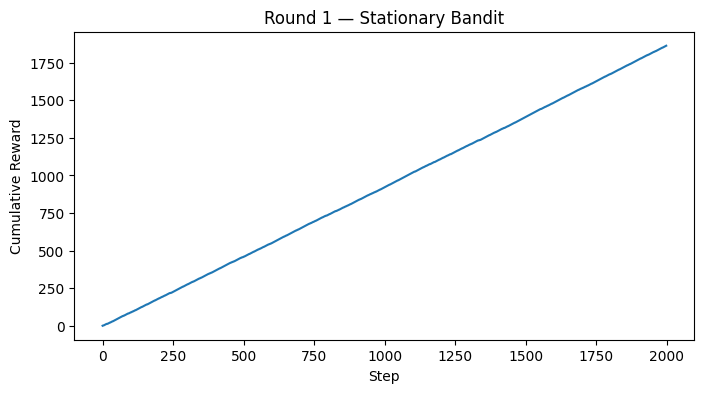

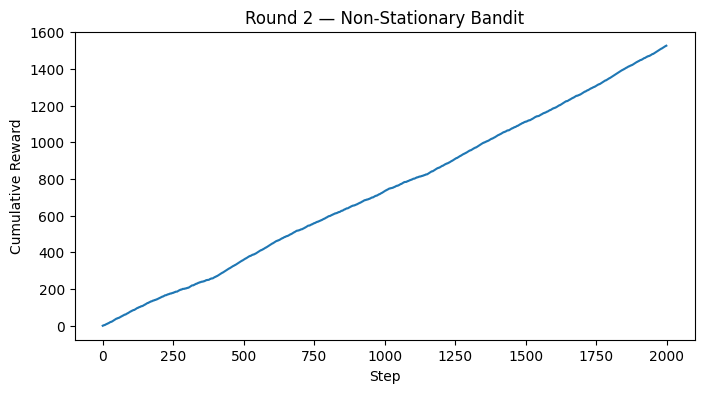

In [26]:
import pandas as pd
from datetime import datetime

# --- Common Settings ---
NAME = "Kapil"
SEED_ENV = 42
STEPS = 2000
N_ARMS = 10

# --- Round 1: Stationary Bandit ---
def epsilon_greedy(true_means, steps=STEPS, epsilon=0.1, seed=123):
    rng = np.random.default_rng(seed)
    n_arms = len(true_means)
    Q = np.zeros(n_arms)
    N = np.zeros(n_arms)
    rewards = []

    for t in range(steps):
        if rng.random() < epsilon:
            a = rng.integers(n_arms)
        else:
            a = np.argmax(Q)

        reward = rng.random() < true_means[a]
        N[a] += 1
        Q[a] += (reward - Q[a]) / N[a]
        rewards.append(reward)

    return np.array(rewards)

# Run Round 1
true_means = make_stationary_bandit(seed=SEED_ENV)
rewards_r1 = epsilon_greedy(true_means, epsilon=0.1, seed=123)
total_reward_r1 = np.sum(rewards_r1)

# Save Round 1 results
round1 = pd.DataFrame([{
    "timestamp": datetime.now().isoformat(),
    "name": NAME,
    "strategy": "epsilon_greedy",
    "details": "fixed_eps=0.1",
    "steps": STEPS,
    "seed_env": SEED_ENV,
    "seed_agent": 123,
    "total_reward": total_reward_r1
}])

round1.to_csv("casino_round1_results.csv", index=False)
print("✅ Saved:", "casino_round1_results.csv")


# --- Round 2: Non-Stationary Bandit ---
def make_nonstationary_bandit(n_arms=10, drift_scale=0.01, seed=42):
    rng = np.random.default_rng(seed)
    means = rng.random(n_arms)
    return means, drift_scale

def epsilon_greedy_nonstationary(n_arms=10, steps=STEPS, epsilon=0.1, drift_scale=0.01, seed_env=42, seed_agent=321):
    rng_env = np.random.default_rng(seed_env)
    rng_agent = np.random.default_rng(seed_agent)
    means = rng_env.random(n_arms)
    Q = np.zeros(n_arms)
    rewards = []

    for t in range(steps):
        if rng_agent.random() < epsilon:
            a = rng_agent.integers(n_arms)
        else:
            a = np.argmax(Q)

        reward = rng_agent.random() < means[a]
        Q[a] += 0.1 * (reward - Q[a])  # fixed learning rate for nonstationary
        rewards.append(reward)

        # Apply drift
        means += rng_env.normal(0, drift_scale, size=n_arms)
        means = np.clip(means, 0, 1)

    return np.array(rewards)

# Run Round 2
rewards_r2 = epsilon_greedy_nonstationary(epsilon=0.1, drift_scale=0.01)
total_reward_r2 = np.sum(rewards_r2)

# Save Round 2 results
round2 = pd.DataFrame([{
    "timestamp": datetime.now().isoformat(),
    "name": NAME,
    "strategy": "epsilon_greedy",
    "steps": STEPS,
    "seed_env": SEED_ENV,
    "seed_agent": 321,
    "drift_scale": 0.01,
    "total_reward": total_reward_r2
}])

round2.to_csv("casino_round2_results.csv", index=False)
print("✅ Saved:", "casino_round2_results.csv")

# --- Optional Visualization ---
plot_cumulative(rewards_r1, "Round 1 — Stationary Bandit")
plot_cumulative(rewards_r2, "Round 2 — Non-Stationary Bandit")


## Stability vs Adaptability

In the stationary environment, the agent's total performance peaked because the conditions never changed. Once the optimal strategy was found—the best arm identified—the agent could maintain high exploitation. However, in the non-stationary setup, the underlying reward dynamics constantly shifted. This demonstrated that clinging to established success becomes a liability when the operational context is dynamic. Essentially, stability rewards sustained exploitation, while a changing world inherently demands adaptability.

## Exploration’s Hidden Value

The initial fixed exploration rate ($\epsilon$-greedy) delivered solid early results but was insufficient for prolonged success. Its failing in the second, shifting environment was a direct consequence of insufficient re-exploration as the world drifted. This outcome underscores a critical finding for dynamic systems: long-term success hinges on a commitment to continuous exploration. This necessitates a strategy, such as using a decaying or adaptive exploration rate, to constantly refresh knowledge and guard against obsolescence.

## Real-World Analogy

This pattern directly reflects fundamental strategic challenges. When a system or market is stable, repeating proven successful actions generates predictable profits and consistent output. Conversely, when the environment undergoes change, relying on the old playbook inevitably leads to underperformance unless the approach is continually updated through experimentation and strategic iteration.

## Integrating Results and Code Extension

At the end of the notebook, I added an additional code block that automatically runs both rounds and generates two CSV files, one for the stationary case and one for the non-stationary case. These files were then used in our analysis to compare performance between the two environments. This made it easier to track, store, and visualize our results in a consistent and reproducible way